**DESCRIPTION**

The tipsters use their skill to study the horses and make a prediction - that they think a particular horse will win a particular race. We take those tipsters predictions and put them through a machine learning algorithm (microsoft azure) asking it to predict a 'win' or 'lose' based upon the tipsters performance history.

When we ask the system to predict if a bet will Win or Lose for say Tipster A - we take the last ID number for that Tipster and add one to it - making it a new ID - outside the systems experience. That ID is used for all that Tipsters bets until the system is updated. The system is updated once a week.

**UID -** Unique ID. Not used in the actual system. The dataset is housed in an access database - the UID keeps all the bets in order. You may find a use for it! <br><br>

**ID -** Each tipsters bets are kept in date and time order with the ID being incremented for each new bet, for each tipster.<br><br>
**Tipster -** The name of the tipster. Each tipsters bets are in order, followed by the next tipsters bets<br><br>
**Date -** The date of the race. Previous experiments showed, to us anyway, that the date was not important, that it was the ID number that showed the system that each tipsters bets are a linear list. The date is still used as it has never been shown to affect results in a negative way.<br><br>
**Track -** The name of the track. Some tipsters favour some tracks more than others and this affects their profit margin.<br><br>
**Horse -** The name of the horse.<br><br>
**Bet Type -** Is the bet a 'Win' bet or an 'Each Way' bet.<br><br>
**Odds -** The odds that the tipster presenting the bet say they got for the bet. When you actually place a bet you rarely get the predicted odds. Would the system be better served by lowering the odds by 10% to 20% which would be more realistic?<br><br>
**Result -** Did the bet Win or Lose.<br><br>
**Tipster Active -** Is the tipster active - true or false<br><br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None  
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import pydotplus
from IPython.display import Image
from imblearn.over_sampling import SMOTE
import scikitplot as skplt

In [2]:
# load the data
df_hr = pd.read_csv('tips.csv', encoding= 'unicode_escape')
df_hr.head()

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,1,1,Tipster A,24/07/2015,Ascot,Fredricka,Win,8.000000,Lose,True
1,2,2,Tipster A,24/07/2015,Thirsk,Spend A Penny,Win,4.500000,Lose,True
2,3,3,Tipster A,24/07/2015,York,Straightothepoint,Win,7.000000,Lose,True
3,4,4,Tipster A,24/07/2015,Newmarket,Miss Inga Sock,Win,5.000000,Lose,True
4,5,5,Tipster A,25/07/2015,Ascot,Peril,Win,4.330000,Win,True


## Data Preprocessing

In [3]:
df_hr.shape

(38248, 10)

Missing value treatment

In [4]:
df_hr.isnull().sum()

UID              0
ID               0
Tipster          0
Date             0
Track            0
Horse            0
Bet Type         0
Odds             0
Result           0
TipsterActive    0
dtype: int64

drop insignificant variables

In [5]:
df = df_hr.drop(['UID','ID','Date'], axis=1)
df.head()

,Tipster,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,Tipster A,Ascot,Fredricka,Win,8.000000,Lose,True
1,Tipster A,Thirsk,Spend A Penny,Win,4.500000,Lose,True
2,Tipster A,York,Straightothepoint,Win,7.000000,Lose,True
3,Tipster A,Newmarket,Miss Inga Sock,Win,5.000000,Lose,True
4,Tipster A,Ascot,Peril,Win,4.330000,Win,True


In [6]:
from sklearn.preprocessing import LabelEncoder
category= ['Bet Type','Result','TipsterActive'] 
encoder= LabelEncoder()
for i in category:
    df[i] = encoder.fit_transform(df[i])
df.head()

,Tipster,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,Tipster A,Ascot,Fredricka,1,8.000000,0,1
1,Tipster A,Thirsk,Spend A Penny,1,4.500000,0,1
2,Tipster A,York,Straightothepoint,1,7.000000,0,1
3,Tipster A,Newmarket,Miss Inga Sock,1,5.000000,0,1
4,Tipster A,Ascot,Peril,1,4.330000,1,1


In [7]:
category= ['Tipster','Track','Horse'] 

for i in category:
    encoding = df.groupby(df[i]).size()
    encoding = encoding/ len(df)
    df[i] = df[i].map(encoding)
df.head()

,Tipster,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,0.034799,0.035427,0.000209,1,8.000000,0,1
1,0.034799,0.010040,0.000026,1,4.500000,0,1
2,0.034799,0.026642,0.000157,1,7.000000,0,1
3,0.034799,0.033753,0.000157,1,5.000000,0,1
4,0.034799,0.035427,0.000105,1,4.330000,1,1


In [8]:
df_feature = df.drop('Result', axis=1)
df_target = df['Result']

## Check for Data Imbalance

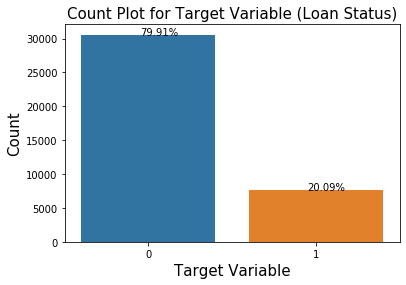

In [9]:
# plot the countplot of the variable 'Loan Status'
sns.countplot(x = df_target)

# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) +
         '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) +
         '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (Loan Status)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

In [10]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='all', k_neighbors=5, random_state=100)

x_bal, y_bal = sm.fit_resample(df_feature, df_target)

In [11]:
df_input = pd.DataFrame(x_bal, columns=df_feature.columns)
df_target = pd.DataFrame(y_bal, columns= pd.DataFrame(df_target).columns)

## Train-Test Split

In [12]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(df_input, df_target, random_state = 10, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (42791, 6)
y_train (42791, 1)
X_test (18339, 6)
y_test (18339, 1)


## Logistic Regression

In [13]:
logReg = LogisticRegression()

logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = logReg.predict(X_test)

In [16]:
# compute the performance measures on train data
test_pred = logReg.predict(X_test)

# return the performace measures on train set
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.65      0.56      0.60      9066
           1       0.62      0.70      0.66      9273

    accuracy                           0.63     18339
   macro avg       0.63      0.63      0.63     18339
weighted avg       0.63      0.63      0.63     18339



## K Nearest Neighbors (KNN)

In [17]:
# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn_classification = KNeighborsClassifier(n_neighbors = 5)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

In [18]:
y_pred_knn = knn_model.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      9066
           1       0.69      0.72      0.71      9273

    accuracy                           0.70     18339
   macro avg       0.70      0.70      0.70     18339
weighted avg       0.70      0.70      0.70     18339



## Naive Bayes Algorithm

In [21]:
# instantiate the 'GaussianNB'
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(X_train, y_train)

In [22]:
y_pred_nb = gnb_model.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.70      0.21      0.33      9066
           1       0.54      0.91      0.68      9273

    accuracy                           0.57     18339
   macro avg       0.62      0.56      0.50     18339
weighted avg       0.62      0.57      0.51     18339



## Decision Tree

In [24]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train, y_train)

In [25]:
# compute the performance measures on train data
test_pred_des = decision_tree.predict(X_test)

In [26]:
print(classification_report(y_test, test_pred_des))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      9066
           1       0.82      0.80      0.81      9273

    accuracy                           0.81     18339
   macro avg       0.81      0.81      0.81     18339
weighted avg       0.81      0.81      0.81     18339



## Random Forest

In [27]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

In [28]:
y_pred_rf = rf_model.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      9066
           1       0.85      0.77      0.81      9273

    accuracy                           0.82     18339
   macro avg       0.82      0.82      0.81     18339
weighted avg       0.82      0.82      0.81     18339



## Conclusion

In [31]:
Models = [ logReg, knn_model,gnb_model, decision_tree, rf_model]

In [32]:
Model_columns = []
Model_compare = pd.DataFrame(columns = Model_columns)

row_index = 0
for alg in Models:  
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    Model_name = alg.__class__.__name__
    Model_compare.loc[row_index,'Models'] = Model_name
    Model_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    Model_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    Model_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    Model_compare.loc[row_index, 'AUC'] = metrics.auc(fp, tp)

    row_index+=1
    
Model_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
Model_compare

,Models,Precission,Recall,Test Accuracy,AUC
4,RandomForestClassifier,0.846308,0.774938,0.815000,0.815497
3,DecisionTreeClassifier,0.815481,0.796398,0.805900,0.806042
1,KNeighborsClassifier,0.694612,0.720155,0.698400,0.698154
0,LogisticRegression,0.619093,0.704950,0.631500,0.630657
2,GaussianNB,0.542465,0.912650,0.566600,0.562656
